### Code untuk di Jupyter notebook

In [13]:
%cd D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [90 10]

D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [90 10]


In [14]:
%ls

 Volume in drive D is Data
 Volume Serial Number is BC6D-4CE5

 Directory of D:\SEMESTER 7\Pembelajaran Mesin\Dataset\process image-3 [90 10]

14/12/2022  10:18    <DIR>          .
14/12/2022  10:18    <DIR>          ..
05/12/2022  04:50        16.758.387 extracted_dataset.hdf5
13/12/2022  21:33         6.307.048 feature_model_K1S1.h5
12/12/2022  00:50         6.307.048 K1S1.h5
12/12/2022  07:17        80.170.824 K1S4.h5
27/12/2021  08:27    <DIR>          model
13/12/2022  23:09        19.046.272 model_K1S1.h5
14/12/2022  09:54        80.170.824 model_K1S4.h5
13/12/2022  23:09        34.619.118 model_svm_K2S1.pkl
14/12/2022  10:18        57.827.538 model_svm_K2S4.pkl
13/12/2022  20:25    <DIR>          new model
13/12/2022  21:34    <DIR>          saved model
12/12/2022  00:50        25.726.443 SVM_K2S1.pkl
12/12/2022  08:03        57.827.538 SVM_K2S4.pkl
13/12/2021  14:58    <DIR>          testing
13/12/2021  14:58    <DIR>          training
              10 File(s)    384.761.040 by

In [15]:
base_dataset = 'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/'

In [16]:
# inisialisasi direktori data train dan train beserta data per kategori
dir1 = [r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/training/acral melanoma/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/testing/acral melanoma/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/training/benign nevi/',
        r'D:/SEMESTER 7/Pembelajaran Mesin/Dataset/process image-3 [90 10]/testing/benign nevi/']

In [17]:
%matplotlib inline
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten, Dropout, Input
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pickle
import time
import matplotlib.image as mpimg

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import auc, roc_curve

In [18]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size)
    img_arr = (np.array(nimg))
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.JPG') or f.endswith('.JPEG')]

def preprocess_norm(img_path):
    im = Image.open(img_path)
    X = preprocess(im,(224,224))
    X = reshape([X])
    info = np.iinfo(X.dtype) # informasi tipe data
    data = X.astype(np.float32) / info.max # normalisasi data to 0 - 1
    #print("data image before extract: ", data)
    return data

In [19]:
def features_labels_extract(list_dir):
    features = []
    labels = []
    for direktori in list_dir:
        img_list = get_imlist(direktori)
        for i, img_path in enumerate(img_list):
            data = preprocess_norm(img_path)
            img_name = os.path.split(img_path)[1]
            features.append(data)
            if 'AM ' in img_name:
                labels.append('acral melanoma')
            else:
                labels.append('benign nevi')
            print("extracting feature from image No. %d , %d images in total" %((i+1), len(img_list)))
    return np.array(features), np.array(labels)

dir_training = [dir1[0], dir1[2]]
x_train, y_train = features_labels_extract(dir_training)

extracting feature from image No. 1 , 315 images in total
extracting feature from image No. 2 , 315 images in total
extracting feature from image No. 3 , 315 images in total
extracting feature from image No. 4 , 315 images in total
extracting feature from image No. 5 , 315 images in total
extracting feature from image No. 6 , 315 images in total
extracting feature from image No. 7 , 315 images in total
extracting feature from image No. 8 , 315 images in total
extracting feature from image No. 9 , 315 images in total
extracting feature from image No. 10 , 315 images in total
extracting feature from image No. 11 , 315 images in total
extracting feature from image No. 12 , 315 images in total
extracting feature from image No. 13 , 315 images in total
extracting feature from image No. 14 , 315 images in total
extracting feature from image No. 15 , 315 images in total
extracting feature from image No. 16 , 315 images in total
extracting feature from image No. 17 , 315 images in total
extrac

extracting feature from image No. 140 , 315 images in total
extracting feature from image No. 141 , 315 images in total
extracting feature from image No. 142 , 315 images in total
extracting feature from image No. 143 , 315 images in total
extracting feature from image No. 144 , 315 images in total
extracting feature from image No. 145 , 315 images in total
extracting feature from image No. 146 , 315 images in total
extracting feature from image No. 147 , 315 images in total
extracting feature from image No. 148 , 315 images in total
extracting feature from image No. 149 , 315 images in total
extracting feature from image No. 150 , 315 images in total
extracting feature from image No. 151 , 315 images in total
extracting feature from image No. 152 , 315 images in total
extracting feature from image No. 153 , 315 images in total
extracting feature from image No. 154 , 315 images in total
extracting feature from image No. 155 , 315 images in total
extracting feature from image No. 156 , 

extracting feature from image No. 282 , 315 images in total
extracting feature from image No. 283 , 315 images in total
extracting feature from image No. 284 , 315 images in total
extracting feature from image No. 285 , 315 images in total
extracting feature from image No. 286 , 315 images in total
extracting feature from image No. 287 , 315 images in total
extracting feature from image No. 288 , 315 images in total
extracting feature from image No. 289 , 315 images in total
extracting feature from image No. 290 , 315 images in total
extracting feature from image No. 291 , 315 images in total
extracting feature from image No. 292 , 315 images in total
extracting feature from image No. 293 , 315 images in total
extracting feature from image No. 294 , 315 images in total
extracting feature from image No. 295 , 315 images in total
extracting feature from image No. 296 , 315 images in total
extracting feature from image No. 297 , 315 images in total
extracting feature from image No. 298 , 

extracting feature from image No. 113 , 337 images in total
extracting feature from image No. 114 , 337 images in total
extracting feature from image No. 115 , 337 images in total
extracting feature from image No. 116 , 337 images in total
extracting feature from image No. 117 , 337 images in total
extracting feature from image No. 118 , 337 images in total
extracting feature from image No. 119 , 337 images in total
extracting feature from image No. 120 , 337 images in total
extracting feature from image No. 121 , 337 images in total
extracting feature from image No. 122 , 337 images in total
extracting feature from image No. 123 , 337 images in total
extracting feature from image No. 124 , 337 images in total
extracting feature from image No. 125 , 337 images in total
extracting feature from image No. 126 , 337 images in total
extracting feature from image No. 127 , 337 images in total
extracting feature from image No. 128 , 337 images in total
extracting feature from image No. 129 , 

extracting feature from image No. 319 , 337 images in total
extracting feature from image No. 320 , 337 images in total
extracting feature from image No. 321 , 337 images in total
extracting feature from image No. 322 , 337 images in total
extracting feature from image No. 323 , 337 images in total
extracting feature from image No. 324 , 337 images in total
extracting feature from image No. 325 , 337 images in total
extracting feature from image No. 326 , 337 images in total
extracting feature from image No. 327 , 337 images in total
extracting feature from image No. 328 , 337 images in total
extracting feature from image No. 329 , 337 images in total
extracting feature from image No. 330 , 337 images in total
extracting feature from image No. 331 , 337 images in total
extracting feature from image No. 332 , 337 images in total
extracting feature from image No. 333 , 337 images in total
extracting feature from image No. 334 , 337 images in total
extracting feature from image No. 335 , 

In [20]:
dir_test = [dir1[1], dir1[3]]
x_test, y_test = features_labels_extract(dir_test)

extracting feature from image No. 1 , 35 images in total
extracting feature from image No. 2 , 35 images in total
extracting feature from image No. 3 , 35 images in total
extracting feature from image No. 4 , 35 images in total
extracting feature from image No. 5 , 35 images in total
extracting feature from image No. 6 , 35 images in total
extracting feature from image No. 7 , 35 images in total
extracting feature from image No. 8 , 35 images in total
extracting feature from image No. 9 , 35 images in total
extracting feature from image No. 10 , 35 images in total
extracting feature from image No. 11 , 35 images in total
extracting feature from image No. 12 , 35 images in total
extracting feature from image No. 13 , 35 images in total
extracting feature from image No. 14 , 35 images in total
extracting feature from image No. 15 , 35 images in total
extracting feature from image No. 16 , 35 images in total
extracting feature from image No. 17 , 35 images in total
extracting feature from

In [21]:
reshaped_x_train = x_train.reshape(x_train.shape[0],x_train.shape[2], x_train.shape[3], x_train.shape[4])
reshaped_x_test = x_test.reshape(x_test.shape[0],x_test.shape[2], x_test.shape[3], x_test.shape[4])
reshaped_x_train.shape

(652, 224, 224, 3)

In [22]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [23]:
class FeatureExtractor:
    def __init__(self):
        inputs = Input(shape=(224,224,3))
      
        conv1 = Conv2D(32, kernel_size=3, strides = 1, activation='relu')(inputs)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
        
        conv1 = Conv2D(64, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv1 = Conv2D(128, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv1 = Conv2D(256, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv1 = Conv2D(512, kernel_size=3, strides = 1, activation='relu')(pool1)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        flat = Flatten()(pool1)
        drop_out = Dropout(0.5)(flat)
        hidden1 = Dense(2048,activation='relu')(drop_out)
        dense = Dense(1, activation='sigmoid')(hidden1)
        self.model = Model(inputs=inputs, outputs=dense)
        self.model.summary()
 
    def fit(self, x_train, y_train):
        self.model.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['accuracy'])
        self.model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1)

In [24]:
model = FeatureExtractor()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 128)       0     

In [25]:
model.fit(reshaped_x_train, y_train)

Epoch 1/50
21/21 [==============================] - 8s 161ms/step - loss: 1.0468 - accuracy: 0.4647
Epoch 2/50
21/21 [==============================] - 2s 106ms/step - loss: 0.6932 - accuracy: 0.5184
Epoch 3/50
21/21 [==============================] - 2s 107ms/step - loss: 0.6925 - accuracy: 0.4923
Epoch 4/50
21/21 [==============================] - 2s 107ms/step - loss: 0.6885 - accuracy: 0.5107
Epoch 5/50
21/21 [==============================] - 2s 108ms/step - loss: 0.6925 - accuracy: 0.5031
Epoch 6/50
21/21 [==============================] - 2s 108ms/step - loss: 0.6878 - accuracy: 0.5567
Epoch 7/50
21/21 [==============================] - 2s 108ms/step - loss: 0.6763 - accuracy: 0.5890
Epoch 8/50
21/21 [==============================] - 2s 107ms/step - loss: 0.6016 - accuracy: 0.6794
Epoch 9/50
21/21 [==============================] - 2s 107ms/step - loss: 0.5586 - accuracy: 0.7377
Epoch 10/50
21/21 [==============================] - 2s 107ms/step - loss: 0.4702 - accuracy: 0.7822

In [26]:
featured_model = Model(inputs=model.model.input, outputs=model.model.layers[-2].output)

In [27]:
x_test = featured_model.predict(reshaped_x_test)
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
x_train = featured_model.predict(reshaped_x_train)
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
model.model.save('model_K1S5.h5')

In [30]:
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
              'C':[0.01,0.1,1, 10, 100, 1000],
              'gamma':[1e-1,1e-2,1e-3, 1e-4, 1e-5]}
clf = GridSearchCV(SVC(), parameters, verbose=1)
modelsvm = clf.fit(x_train, y_train)

# svmclf = SVC(C=10, gamma=0.001, kernel='rbf')
# modelsvm = svmclf.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [31]:
modelsvm.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [32]:
y_testSVM = modelsvm.predict(x_test)

y_pred = (y_testSVM > 0.5).astype(int)
target_names = ['acral melanoma', 'benign nevi']
print(classification_report(y_test, y_pred, target_names=target_names))

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('acc score : ', modelsvm.score(x_test,y_test))

                precision    recall  f1-score   support

acral melanoma       0.89      0.94      0.92        35
   benign nevi       0.94      0.89      0.92        37

      accuracy                           0.92        72
     macro avg       0.92      0.92      0.92        72
  weighted avg       0.92      0.92      0.92        72

Confusion Matrix
[[33  2]
 [ 4 33]]
acc score :  0.9166666666666666


C:\Users\Fadhlan\Anaconda3\envs\tf2.6\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


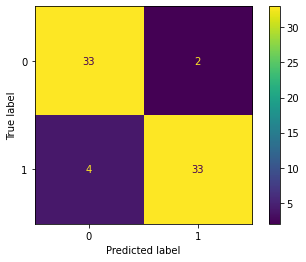

In [33]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelsvm, x_test, y_test)  
#plt.savefig('D:/SEMESTER 7/Pembelajaran Mesin/features/Skenario 4 - Pretrained [90 10]/cm-pretrained.svg')
plt.show()

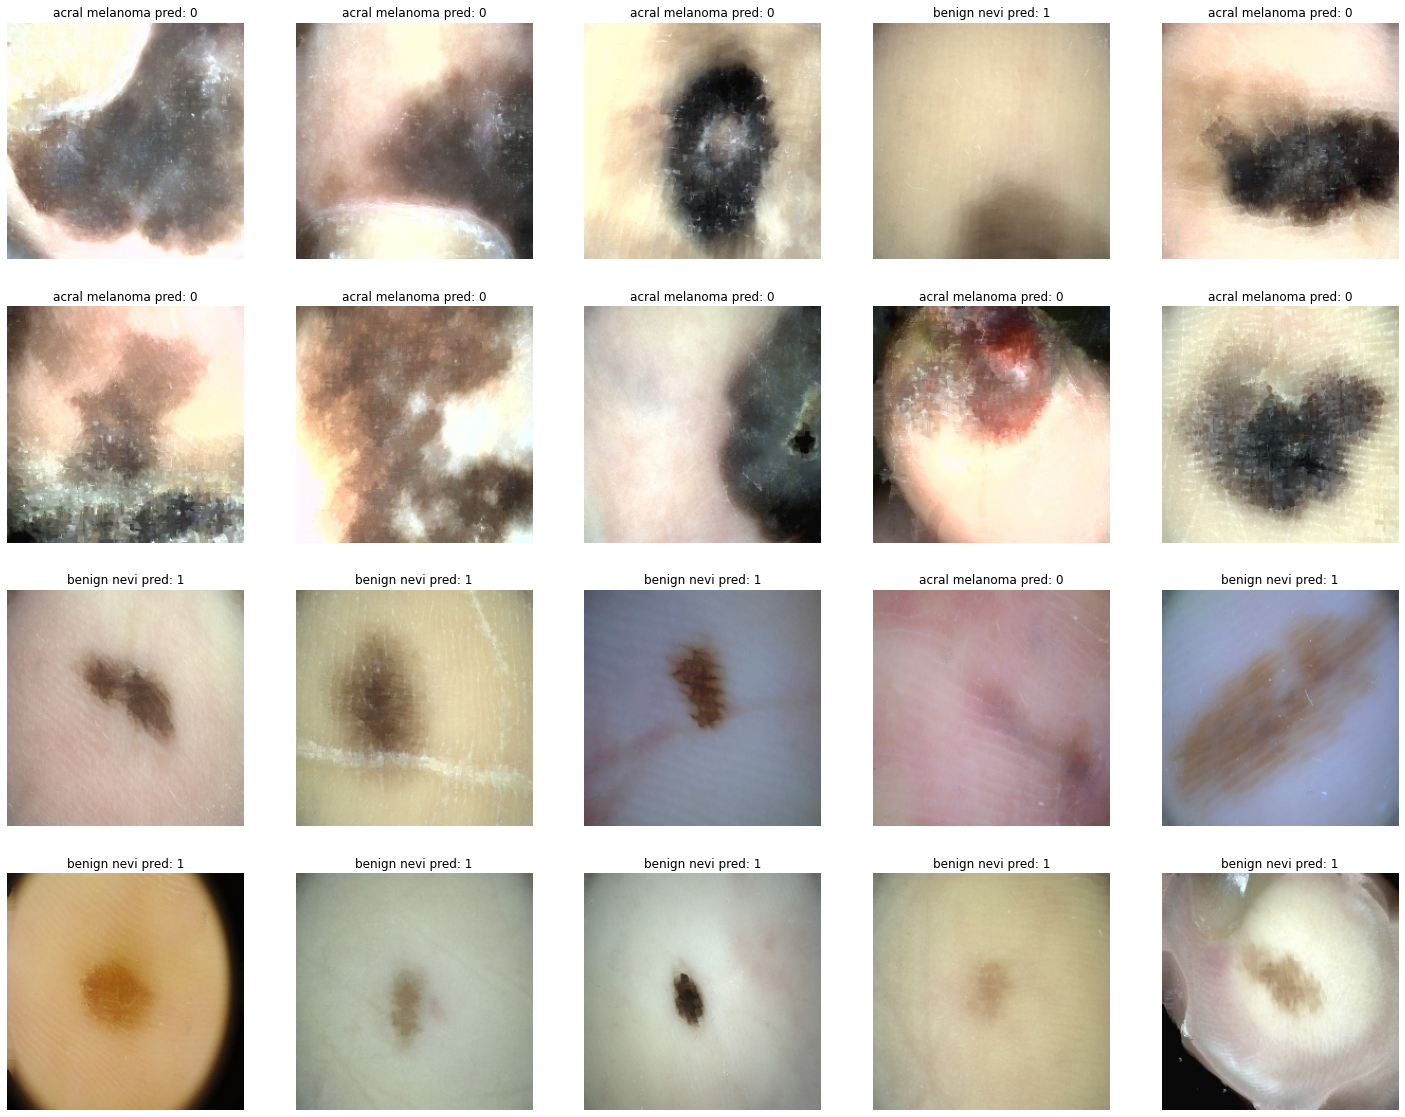

In [35]:
nrows = 4
ncols = 5
input_size = (224, 224)
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 20
melanoma_pix = [os.path.join(dir1[1], fname) for fname in os.listdir(dir1[1])[:10]]
benign_pix = [os.path.join(dir1[3], fname) for fname in os.listdir(dir1[3])[:10]]

for i, img_path in enumerate(melanoma_pix+benign_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i+1)
    categories = ['acral melanoma', 'benign nevi']
    data = preprocess_norm(img_path)
    feats = featured_model.predict(data)
    reshaped_feats = feats.reshape(feats.shape[0],feats.shape[1])
    norm_feat = np.array(reshaped_feats)
    start = time.time()
    y = modelsvm.predict(norm_feat)
    waktu = time.time() - start

    if categories[int(np.round(y, 0))] == 'benign nevi':
        plt.title(categories[int(np.round(y, 0))] + ' pred: '+ str(int(np.round(y, 0))))
        plt.xlabel(' waktu: ' + str(waktu))
    else:
        plt.title(categories[int(np.round(y, 0))] + ' pred: '+ str(int(np.round(y, 0))))
        plt.xlabel(' waktu: ' + str(waktu))
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [36]:
print('acc score : ', modelsvm.score(x_train,y_train))

acc score :  0.9984662576687117


In [37]:
print('acc score : ', modelsvm.score(x_test,y_test))

acc score :  0.9166666666666666


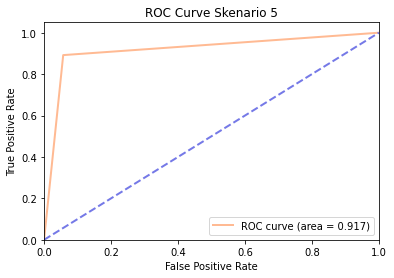

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#ffba93',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#7579e7', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Skenario 5')
plt.legend(loc="lower right")
#plt.savefig('D:/SEMESTER 7/Pembelajaran Mesin/features/Skenario 4 - Pretrained [90 10]/roc-curve-skenario-4.svg')
plt.show()

In [40]:
# Save model
with open('model_svm_K2S5.pkl', 'wb') as file:
    pickle.dump(modelsvm, file)